#avg of raw input

In [21]:
import os
import pandas as pd 
path = "/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/"
raw_input_feather_path = os.path.join(path, "updated_local_hour_adjusted_variables_HW98_daily_agg.feather")
#load the feather file
raw_input_df = pd.read_feather(raw_input_feather_path)



In [ ]:
#print the columns without ...
print(raw_input_df.columns)

In [22]:

#globle average of UHI_diff
uhi_diff_mean = raw_input_df['UHI_diff'].mean()
uhi_diff_mean




0.1861672

In [23]:
#list distinct KGMainGroup
raw_input_df['KGMajorClass'].unique()




array(['Temperate', 'Arid', 'Tropical', None, 'Polar', 'Cold'],
      dtype=object)

In [24]:
#check any missing values for KGMajorClass
raw_input_df['KGMajorClass'].isnull().sum()






393120

In [29]:
#compute the global average of UHI_diff where KGMajorClass is not missing and not Polar


# filtered_df = raw_input_df[raw_input_df['KGMajorClass'].notnull() & (raw_input_df['KGMajorClass'] != 'Polar')]
filtered_df = raw_input_df[ (raw_input_df['KGMajorClass'] != 'Polar')]
global_uhi_diff_avg = filtered_df['UHI_diff'].mean()
print("Global average of UHI_diff (excluding missing KGMajorClass and 'Polar'):", global_uhi_diff_avg)






Global average of UHI_diff (excluding missing KGMajorClass and 'Polar'): 0.18616973


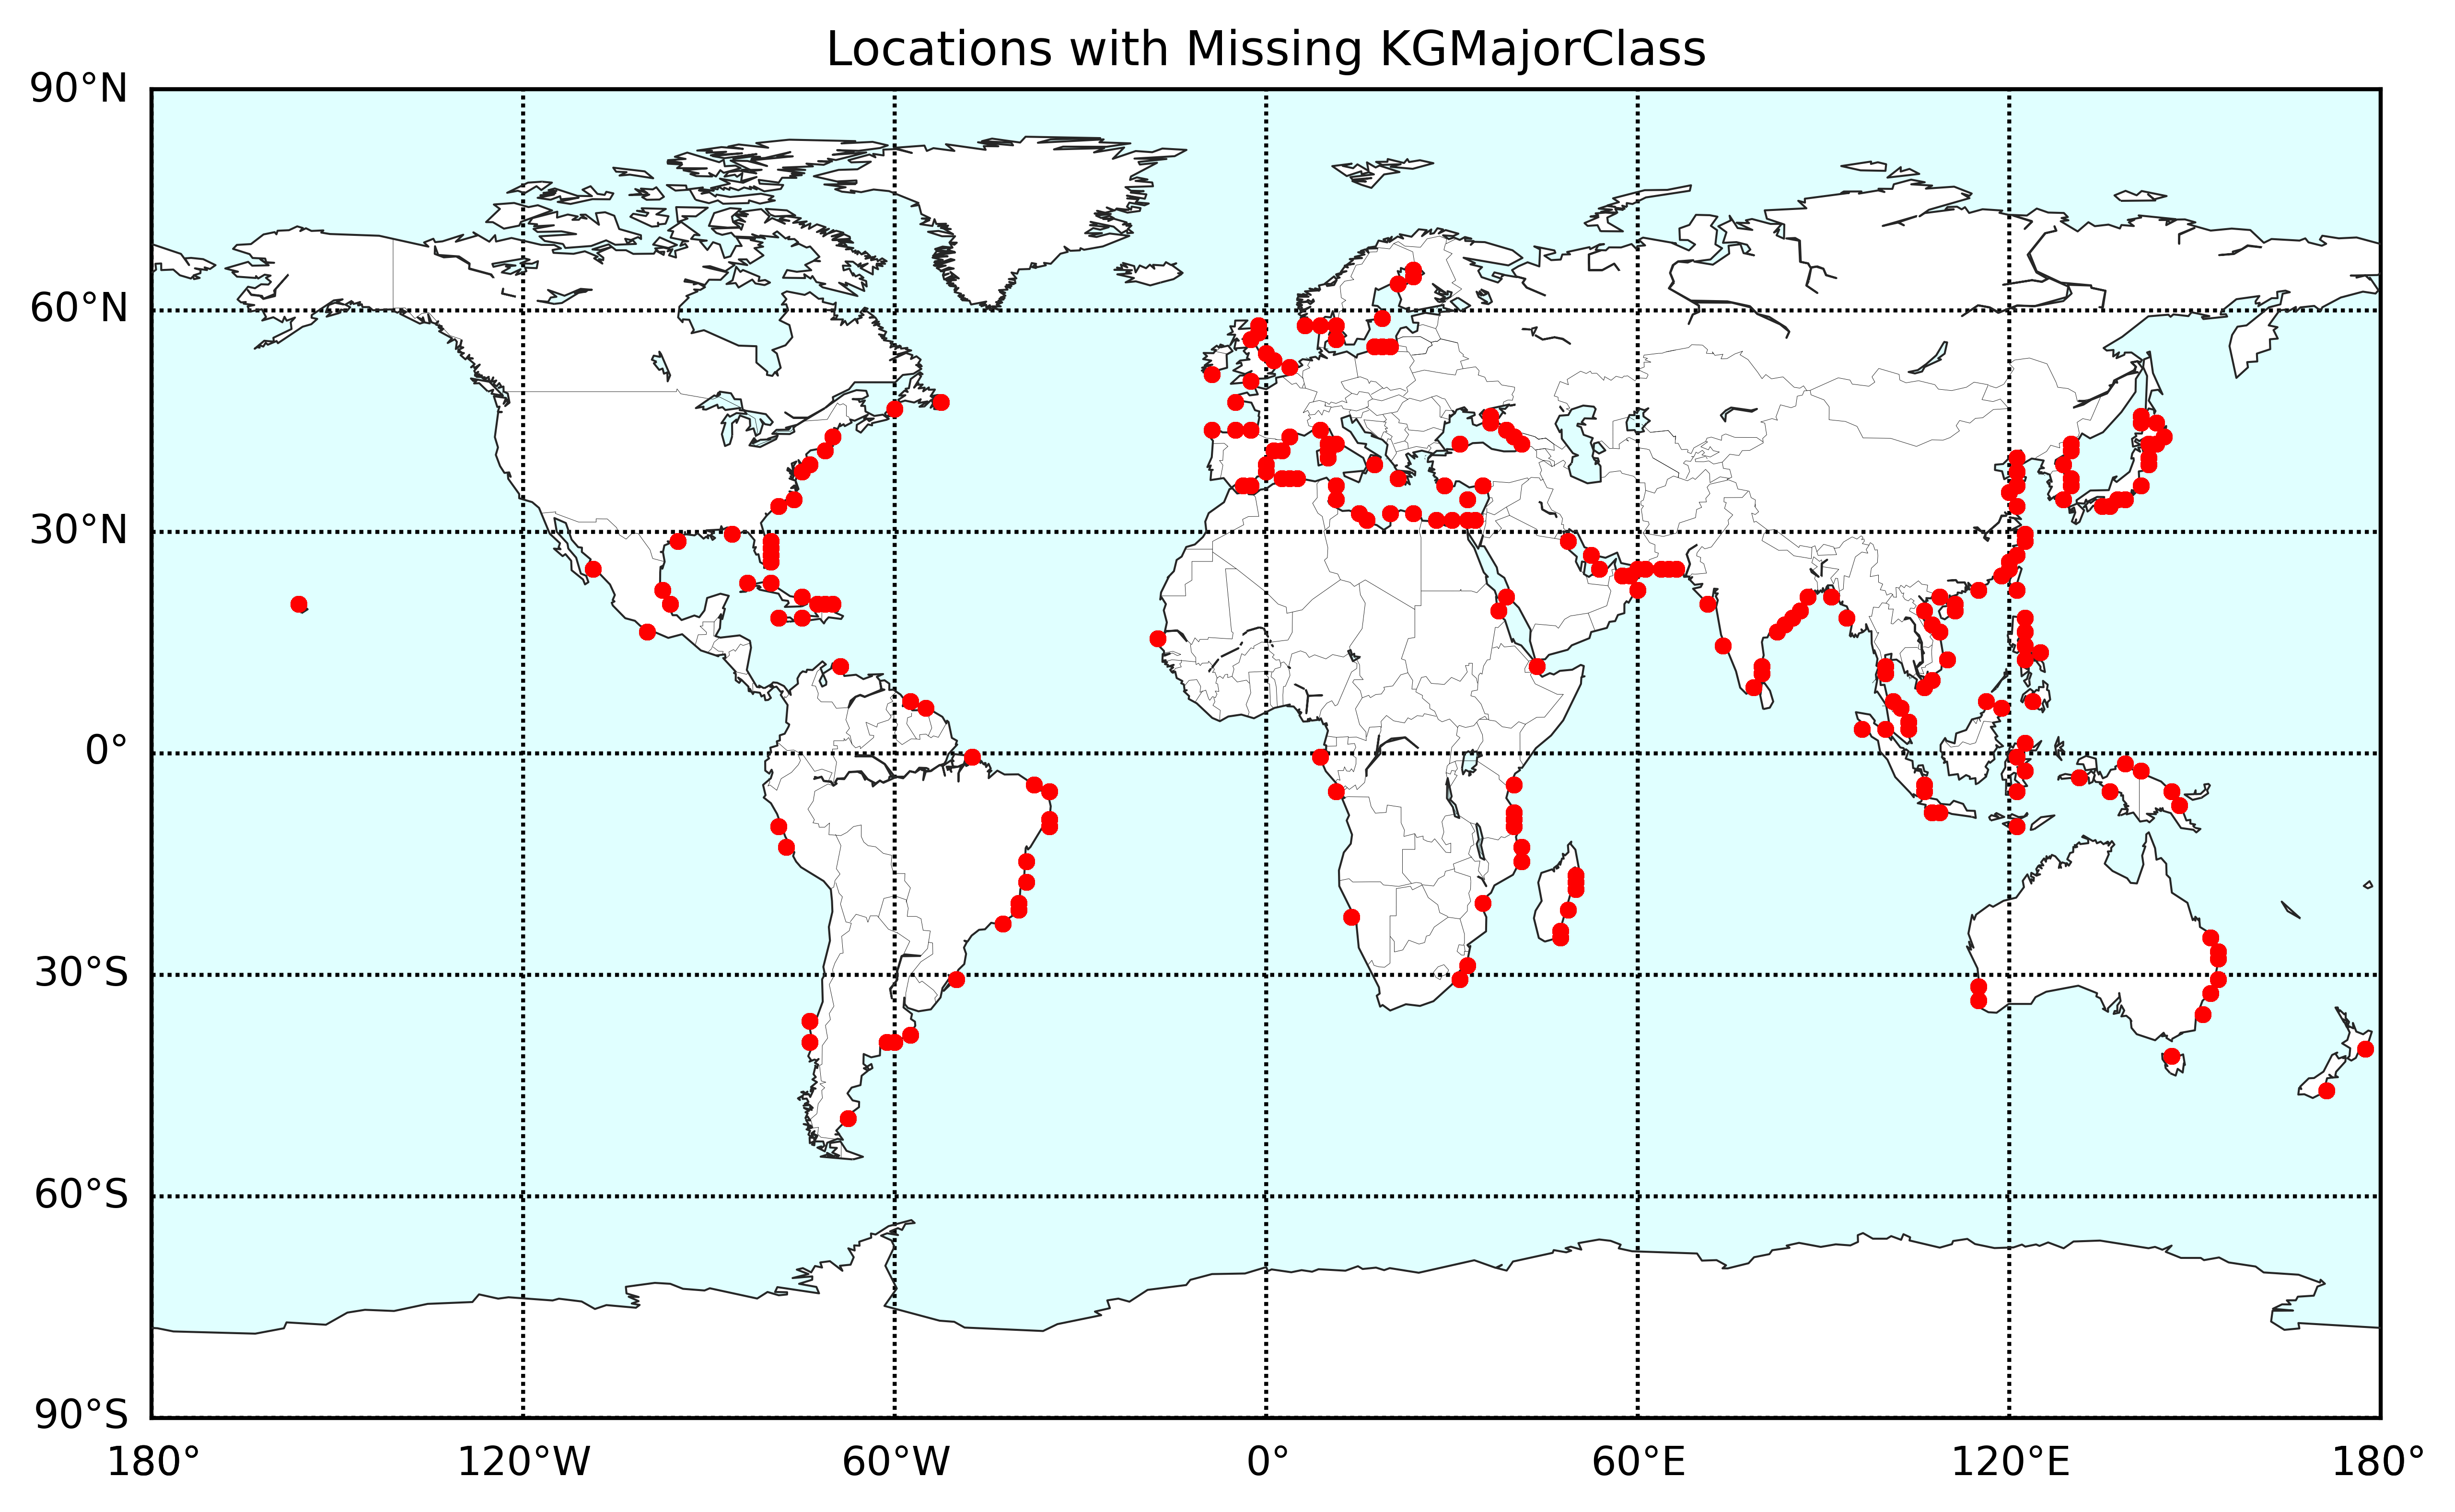

In [27]:
import pandas as pd
import numpy as np
import xarray as xr
import os
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

def normalize_longitude(lon):
    return ((lon + 180) % 360) - 180

# plot global map of missing values for KGMajorClass
def plot_missing_kgmajorclass(df, output_dir):
    """Plots locations where KGMajorClass is missing on a global map."""

    # Filter for rows where KGMajorClass is missing
    missing_data = df[df['KGMajorClass'].isna()]

    if missing_data.empty:
        print("No missing KGMajorClass data to plot.")
        return

    fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
    m = Basemap(projection='cyl', lon_0=0, ax=ax, fix_aspect=False,
                llcrnrlat=-44.94133, urcrnrlat=65.12386)
    m.drawcoastlines(color='0.15', linewidth=0.5, zorder=3)
    m.drawcountries(linewidth=0.1)
    m.fillcontinents(color='white', lake_color='lightcyan')
    m.drawmapboundary(fill_color='lightcyan')
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 60.), labels=[0,0,0,1], fontsize=10)

    # Normalize longitudes and plot
    normalized_lons = normalize_longitude(missing_data['lon'].values)
    x, y = m(normalized_lons, missing_data['lat'].values)
    m.scatter(x, y, color='red', marker='o', s=10, alpha=0.75, zorder=4)

    ax.set_title('Locations with Missing KGMajorClass')

    if output_dir:
        save_plot(plt, "missing_kgmajorclass_locations.png", output_dir)
    else:
        plt.show()


plot_missing_kgmajorclass(raw_input_df, None)




# load the shap_values_with_additional_columns.feather in an experiment

In [1]:
import os
import pandas as pd 

# path = "/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/mlartifacts/265544768812067806/ff8aec60294a4d8db56c35f92d8300ed/artifacts"
# path = "/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/mlartifacts/143560831933597437/a557890b9462417da6a603eca02dafe8/artifacts"

# Combined_Final3_NO_LE_Hourly_HW98_Hour
path = "/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/mlartifacts/893793682234305734/67f2e168085e4507b0a79941b74d7eb7/artifacts"
shap_values_feather_path = os.path.join(path, "shap_values_with_additional_columns.feather")
print(shap_values_feather_path)

shap_values_df = pd.read_feather(shap_values_feather_path)

shap_values_df.head()   

/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.05/research_results/summary/mlflow/mlartifacts/893793682234305734/67f2e168085e4507b0a79941b74d7eb7/artifacts/shap_values_with_additional_columns.feather


,Double_Differencing_Q2M_shap,hw_nohw_diff_Q2M_shap,hw_nohw_diff_SOILWATER_10CM_shap,hw_nohw_diff_FSH_shap,hw_nohw_diff_U10_shap,Double_Differencing_FIRA_shap,Double_Differencing_FGR_shap,hw_nohw_diff_HEAT_FROM_AC_shap,hw_nohw_diff_Qstor_shap,delta_FSA_shap,...,delta_FSA,global_event_ID,lon,lat,time,KGClass,KGMajorClass,UHI_diff,local_hour,Estimation_Error
0,0.032216,0.004833,-0.078470,0.100914,-0.010636,-0.103392,-0.105948,-0.005349,0.075214,0.000020,...,0.0,24739_1,323.75,-9.895288,1985-01-02 02:00:00,"Tropical, savannah",Tropical,0.220502,23,-0.044317
1,-0.003992,-0.006669,-0.079008,0.077061,-0.060508,-0.032098,-0.085212,-0.004208,0.060972,0.000058,...,0.0,25027_1,323.75,-8.952880,1985-01-02 02:00:00,"Tropical, savannah",Tropical,0.097087,23,0.036093
2,-0.013038,0.003129,-0.029023,0.025311,0.057897,-0.040093,-0.053470,0.000254,0.085648,0.000057,...,0.0,25315_1,323.75,-8.010471,1985-01-02 02:00:00,"Arid, steppe, hot",Arid,0.154366,23,0.149090
3,-0.000244,0.002331,0.035846,-0.042552,0.077787,-0.065311,-0.021708,0.000480,0.073044,0.000089,...,0.0,25603_1,323.75,-7.068063,1985-01-02 02:00:00,"Arid, steppe, hot",Arid,0.221883,23,0.104664
4,-0.006119,0.012614,-0.014880,-0.102122,0.038312,-0.161932,-0.043367,0.001205,0.100602,0.000131,...,0.0,25604_1,325.00,-7.068063,1985-01-02 02:00:00,"Tropical, savannah",Tropical,0.203184,23,-0.111954


globle average

In [9]:
# Select the specified columns
columns_to_aggregate = [
    'UHI_diff',
    'base_value',
    'Double_Differencing_Q2M',
    'hw_nohw_diff_Q2M',
    'hw_nohw_diff_SOILWATER_10CM',
    'hw_nohw_diff_FSH',
    'hw_nohw_diff_U10',
    'Double_Differencing_FIRA',
    'Double_Differencing_FGR',
    'hw_nohw_diff_HEAT_FROM_AC',
    'hw_nohw_diff_Qstor',
    'delta_FSA'
]
avg_globle = shap_values_df[columns_to_aggregate].mean().reset_index()
avg_globle.head()   

,index,0
0,UHI_diff,0.186170
1,base_value,0.186170
2,Double_Differencing_Q2M,-0.000118
3,hw_nohw_diff_Q2M,0.000208
4,hw_nohw_diff_SOILWATER_10CM,-3.732884


# globle hourly average

In [6]:
# Select the specified columns
columns_to_aggregate = [
    'UHI_diff',
    'base_value',
    'Double_Differencing_Q2M',
    'hw_nohw_diff_Q2M',
    'hw_nohw_diff_SOILWATER_10CM',
    'hw_nohw_diff_FSH',
    'hw_nohw_diff_U10',
    'Double_Differencing_FIRA',
    'Double_Differencing_FGR',
    'hw_nohw_diff_HEAT_FROM_AC',
    'hw_nohw_diff_Qstor',
    'delta_FSA'
]

avg_hourly_var_level_global = shap_values_df.groupby(['local_hour'])[columns_to_aggregate].mean().reset_index()
avg_hourly_var_level_global.head()

,local_hour,UHI_diff,base_value,Double_Differencing_Q2M,hw_nohw_diff_Q2M,hw_nohw_diff_SOILWATER_10CM,hw_nohw_diff_FSH,hw_nohw_diff_U10,Double_Differencing_FIRA,Double_Differencing_FGR,hw_nohw_diff_HEAT_FROM_AC,hw_nohw_diff_Qstor,delta_FSA
0,0,0.272791,0.272791,-1.470400e-05,0.000197,-3.725581,-4.166567,-0.012413,2.870586,-12.382733,0.003957,1.007065,0.000889
1,1,0.284388,0.284388,-1.453804e-05,0.000202,-3.733722,-4.130501,-0.029991,2.927680,-12.233191,0.003518,0.881718,0.000822
2,2,0.296257,0.296258,-1.361147e-05,0.000193,-3.742834,-4.148513,-0.050084,2.996942,-12.021149,0.003139,0.765682,0.002299
3,3,0.308264,0.308264,-8.669274e-06,0.000197,-3.740413,-3.927591,-0.062276,3.042949,-11.616156,0.002805,0.503405,0.013529
4,4,0.330743,0.330743,-2.913442e-07,0.000204,-3.738928,-3.870427,-0.073181,3.113276,-10.574341,0.002518,0.163517,0.091017


## get hourly level for each KG 

In [8]:


# Group by KGMajorClass and local_hour and calculate the mean for the selected columns
# Note: Assuming 'mean' aggregation as it was not specified. Change .mean() if another aggregation is needed.
avg_hourly_var_level_by_kg = shap_values_df.groupby(['KGMajorClass', 'local_hour'])[columns_to_aggregate].mean().reset_index()

# # Display the first few rows of the result
# print(avg_hourly_var_level_by_kg.head())
avg_hourly_var_level_by_kg.head()

,KGMajorClass,local_hour,UHI_diff,base_value,Double_Differencing_Q2M,hw_nohw_diff_Q2M,hw_nohw_diff_SOILWATER_10CM,hw_nohw_diff_FSH,hw_nohw_diff_U10,Double_Differencing_FIRA,Double_Differencing_FGR,hw_nohw_diff_HEAT_FROM_AC,hw_nohw_diff_Qstor,delta_FSA
0,Arid,0,0.175951,0.272791,2.884449e-07,-0.000334,-2.022629,-3.897987,0.069045,2.475861,-10.750132,0.003289,1.343542,0.000000
1,Arid,1,0.180900,0.284388,-2.294221e-06,-0.000335,-2.031082,-3.682673,0.058059,2.480445,-10.483750,0.002688,0.935162,0.000000
2,Arid,2,0.190907,0.296258,-8.304582e-06,-0.000371,-2.043995,-3.676826,0.035262,2.571731,-10.395029,0.002214,0.797072,0.000000
3,Arid,3,0.208866,0.308264,-1.427640e-05,-0.000410,-2.051826,-3.526176,0.016992,2.683008,-10.189768,0.001831,0.583475,0.000000
4,Arid,4,0.253243,0.330743,-1.428943e-05,-0.000459,-2.058555,-3.465579,-0.003265,2.892145,-8.721045,0.001510,0.298050,0.002904
